# Investigate the influence of the representation on the performance of the model

One dataset for which we have common names as well as IUPAC names and SMILES is the solubility dataset.

In [1]:
%load_ext autoreload
%autoreload 2

In [52]:
from gpt3forchem.data import get_solubility_data, get_photoswitch_data
from typing import Iterable, List
from gpt3forchem.helpers import get_num_token_dist, get_representation_length_dist, get_token_counts
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
plt.style.use(['science', 'nature'])

In [3]:
def get_num_token_and_len_dist_and_token_counts(representations): 
    return get_num_token_dist(representations), get_representation_length_dist(representations), get_token_counts(representations)

## Solubility data

In [26]:
data = get_solubility_data()

In [27]:
smiles_num_tokens_sol, smiles_len_sol, smiles_token_counts_sol = get_num_token_and_len_dist_and_token_counts(data['SMILES'])

In [28]:
inchi_num_tokens_sol, inchi_len_sol, inchi_token_counts_sol = get_num_token_and_len_dist_and_token_counts(data['InChI'])

In [29]:
selfies_num_tokens_sol, selfies_len_sol, selfies_token_counts_sol = get_num_token_and_len_dist_and_token_counts(data['selfies'])

In [30]:
iupac_name_num_tokens_sol, iupac_name_len_sol, iupac_token_counts_sol = get_num_token_and_len_dist_and_token_counts(data['iupac_names'])

In [31]:
common_name_num_tokens_sol, common_name_len_sol, common_name_token_counts_sol = get_num_token_and_len_dist_and_token_counts(data['Name'])

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

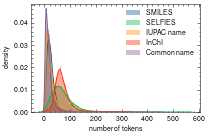

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.distplot(smiles_num_tokens_sol, label='SMILES', ax=ax)
sns.distplot(selfies_num_tokens_sol, label='SELFIES', ax=ax)
sns.distplot(iupac_name_num_tokens_sol, label='IUPAC name', ax=ax)
sns.distplot(inchi_num_tokens_sol, label='InChI', ax=ax)
sns.distplot(common_name_num_tokens_sol, label='Common name', ax=ax)

ax.set_xlabel('number of tokens')
ax.set_ylabel('density')
ax.legend()
fig.tight_layout()
fig.savefig('num_token_dist_solubility.pdf', bbox_inches='tight')

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

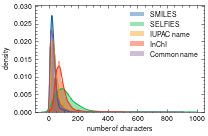

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.distplot(smiles_len_sol, label='SMILES', ax=ax)
sns.distplot(selfies_len_sol, label='SELFIES', ax=ax)
sns.distplot(iupac_name_len_sol, label='IUPAC name', ax=ax)
sns.distplot(inchi_len_sol, label='InChI', ax=ax)
sns.distplot(common_name_len_sol, label='Common name', ax=ax)


ax.set_xlabel('number of characters')
ax.set_ylabel('density')
ax.legend()
fig.tight_layout()
fig.savefig('len_repr_dist.pdf', bbox_inches='tight')

In [35]:
for name, tokens, lengths in zip(['SMILES', 'SELFIES', 'IUPAC name', 'INChI', 'common name'], [smiles_num_tokens_sol, selfies_num_tokens_sol, iupac_name_num_tokens_sol, inchi_num_tokens_sol, common_name_num_tokens_sol ], [smiles_len_sol, selfies_len_sol, iupac_name_len_sol, inchi_len_sol, common_name_len_sol]): 
    #print(f'{name} has {len(tokens)} unique tokens and {len(lengths)} unique lengths')

    print(f"{name}  & \\num# {np.round(np.mean(tokens),2)} \\pm   {np.round(np.std(tokens),2)} $ & \\num# {np.round(np.mean(lengths),2)} \\pm   {np.round(np.std(lengths),2)} $  \\\\".replace('#', '{').replace('$', '}'))

SMILES  & \num{ 24.87 \pm   18.18 } & \num{ 31.54 \pm   22.36 }  \\
SELFIES  & \num{ 72.53 \pm   50.75 } & \num{ 122.82 \pm   89.02 }  \\
IUPAC name  & \num{ 23.76 \pm   19.65 } & \num{ 46.75 \pm   34.8 }  \\
INChI  & \num{ 69.89 \pm   30.92 } & \num{ 84.77 \pm   44.52 }  \\
common name  & \num{ 17.3 \pm   16.98 } & \num{ 35.61 \pm   30.52 }  \\


In [117]:
low_data_performance_solubility = {
    'SMILES': 0.803086,
    'SELFIES': 0.802838,
    'IUPAC name': 0.760933,
    'InChI': 0.786629,
    'Name': 0.757311
}

## Photoswitch data

In [118]:
data = get_photoswitch_data()

In [119]:
data.dropna(subset=['name'], inplace=True)

In [120]:
data.head()

,index,SMILES,rate of thermal isomerisation from Z-E in s-1,Solvent used for thermal isomerisation rates,Z PhotoStationaryState,E PhotoStationaryState,E isomer pi-pi* wavelength in nm,Extinction,E isomer n-pi* wavelength in nm,Extinction coefficient in M-1 cm-1,...,CAM-B3LYP/6-31G** DFT Z isomer pi-pi* wavelength in nm,CAM-B3LYP/6-31G** DFT Z isomer n-pi* wavelength in nm,BHLYP/6-31G* DFT E isomer pi-pi* wavelength in nm,BHLYP/6-31G* DFT E isomer n-pi* wavelength in nm,BHLYP/6-31G* Z isomer pi-pi* wavelength in nm,BHLYP/6-31G* DFT Z isomer n-pi* wavelength in nm,name,selfies,wavelength_cat,inchi
4,5,C[N]1N=C(C)C(=C1C)N=NC2=CC=CC=C2,7.700000e-07,MeCN,98.0,98.0,335.0,2.27,425.0,0.0963,...,279.0,449.0,NaN,NaN,NaN,NaN,"phenyl-(1,3,5-trimethylpyrazol-4-yl)diazene",[C][NH0][N][=C][Branch1][C][C][C][=Branch1][Br...,very small,InChI=1S/C12H14N4/c1-9-12(10(2)16(3)15-9)14-13...
11,12,CN1C(/N=N/C2=CC=CC=C2)=NC=C1,2.200000e-05,MeCN,98.0,NaN,363.0,1.70,417.0,0.1260,...,NaN,NaN,NaN,NaN,NaN,NaN,(1-methylimidazol-2-yl)-phenyldiazene,[C][N][C][Branch1][O][/N][=N][/C][=C][C][=C][C...,small,InChI=1S/C10H10N4/c1-14-8-7-11-10(14)13-12-9-5...
29,30,FC1=CC=CC=C1/N=N/C2=C(F)C=CC=C2,1.750370e-05,MeCN at 60C,66.0,82.0,325.0,20000.00,448.0,700.0000,...,322.0,466.0,NaN,NaN,NaN,NaN,bis(2-fluorophenyl)diazene,[F][C][=C][C][=C][C][=C][Ring1][=Branch1][/N][...,very small,InChI=1S/C12H8F2N2/c13-9-5-1-3-7-11(9)15-16-12...
32,33,FC1=CC(F)=CC(F)=C1/N=N/C(C(F)=C2)=C(F)C=C2F,9.600000e-06,MeCN at 60C,94.0,91.0,309.0,20000.00,450.0,900.0000,...,310.0,453.0,NaN,NaN,NaN,NaN,"bis(2,4,6-trifluorophenyl)diazene",[F][C][=C][C][Branch1][C][F][=C][C][Branch1][C...,very small,InChI=1S/C12H4F6N2/c13-5-1-7(15)11(8(16)2-5)19...
33,34,FC1=C(F)C=C(F)C(F)=C1/N=N/C2=C(F)C(F)=CC(F)=C2F,7.131140e-06,MeCN at 60C,92.0,92.0,303.0,16000.00,456.0,700.0000,...,363.0,439.0,NaN,NaN,NaN,NaN,"bis(2,3,5,6-tetrafluorophenyl)diazene",[F][C][=C][Branch1][C][F][C][=C][Branch1][C][F...,very small,InChI=1S/C12H2F8N2/c13-3-1-4(14)8(18)11(7(3)17...


In [121]:
smiles_num_tokens_ps, smiles_len_ps, smiles_token_counts_ps = get_num_token_and_len_dist_and_token_counts(data['SMILES'])

In [122]:
selfies_num_tokens_ps, selfies_len_ps, selfies_token_counts_ps = get_num_token_and_len_dist_and_token_counts(data['selfies'])

In [123]:
iupac_name_num_tokens_ps, iupac_name_len_ps, iupac_token_counts_ps = get_num_token_and_len_dist_and_token_counts(data['name'])

In [124]:
inchi_num_tokens_ps, inchi_len_ps, inchi_token_counts_ps = get_num_token_and_len_dist_and_token_counts(data['inchi'])

/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kevinmaikjablonka/miniconda3/envs/gpt3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use e

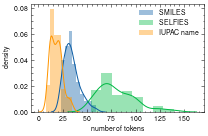

In [125]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.distplot(smiles_num_tokens_ps, label='SMILES', ax=ax)

sns.distplot(selfies_num_tokens_ps, label='SELFIES', ax=ax)
sns.distplot(iupac_name_num_tokens_ps, label='IUPAC name', ax=ax)

ax.set_xlabel('number of tokens')
ax.set_ylabel('density')
ax.legend()
fig.tight_layout()
fig.savefig('num_token_dist_photoswitch.pdf', bbox_inches='tight')

In [126]:
low_data_performance_ps = {
    'SMILES': 0.747544,
    'SELFIES': 0.755975,
    'IUPAC name': 0.822344,
    'InChI': 0.746316,
}

In [166]:
ps_results = {
    'accuracy': [low_data_performance_ps['SMILES'], low_data_performance_ps['SELFIES'], low_data_performance_ps['IUPAC name'], low_data_performance_ps['InChI']],
    'representation': ['SMILES', 'SELFIES', 'IUPAC name', 'InChI'],
    'num_tokens': [np.median(smiles_num_tokens_ps), np.median(selfies_num_tokens_ps), np.median(iupac_name_num_tokens_ps), np.median(inchi_num_tokens_ps)],
    'unique_tokens': [len(smiles_token_counts_ps), len(selfies_token_counts_ps), len(iupac_token_counts_ps), len(inchi_token_counts_ps)],
}

In [167]:
sol_results = {
    'accuracy': [low_data_performance_solubility['SMILES'], low_data_performance_solubility['SELFIES'], low_data_performance_solubility['IUPAC name'], low_data_performance_solubility['InChI']],
    'representation': ['SMILES', 'SELFIES', 'IUPAC name', 'InChI'],
    'num_tokens': [np.median(smiles_num_tokens_sol), np.median(selfies_num_tokens_sol), np.median(iupac_name_num_tokens_sol), np.median(inchi_num_tokens_sol)],
    'unique_tokens': [len(smiles_token_counts_sol), len(selfies_token_counts_sol), len(iupac_token_counts_sol), len(inchi_token_counts_sol)],
    
}

In [168]:
ps_results = pd.DataFrame(ps_results)
sol_results = pd.DataFrame(sol_results)

In [169]:
ps_results

,accuracy,representation,num_tokens,unique_tokens
0,0.747544,SMILES,33.0,36
1,0.755975,SELFIES,75.5,24
2,0.822344,IUPAC name,19.0,109
3,0.746316,InChI,72.0,49


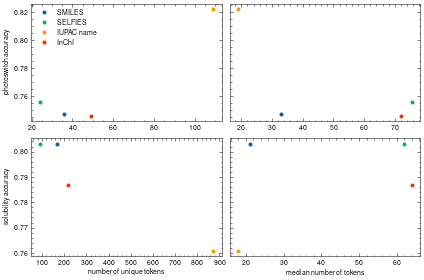

In [171]:
fig, ax = plt.subplots(2, 2, figsize=(6, 4), sharey='row')
for i, row  in ps_results.iterrows():
    ax[0][0].plot(row['unique_tokens'], row['accuracy'], 'o', label=row['representation'])

    ax[0][1].plot(row['num_tokens'], row['accuracy'], 'o', label=row['representation'])

for i, row  in sol_results.iterrows():
    ax[1][0].plot(row['unique_tokens'], row['accuracy'], 'o', label=row['representation'])

    ax[1][1].plot(row['num_tokens'], row['accuracy'], 'o', label=row['representation'])


ax[1][0].set_xlabel('number of unique tokens')
ax[1][1].set_xlabel('median number of tokens')
ax[0][0].set_ylabel('photoswitch accuracy')
ax[1][0].set_ylabel('solubility accuracy')
ax[0][0].legend()

fig.tight_layout()

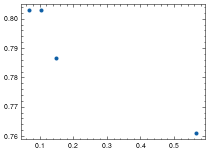

In [162]:
plt.plot(sol_results['num_tokens']/sol_results['num_tokens'].max() * sol_results['unique_tokens']/sol_results['unique_tokens'].max(), sol_results['accuracy'], 'o')

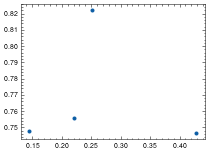

In [150]:
plt.plot(ps_results['num_tokens']/ps_results['num_tokens'].max() * ps_results['unique_tokens']/ps_results['unique_tokens'].max(), ps_results['accuracy'], 'o')